# Understanding flight delays ✈️

## 📖 Background

You work for a major airline operating flights across the USA. Flight delays are a
significant challenge for both the airline and passengers, causing disruptions, financial
losses, and dissatisfaction. As part of the airline’s data analytics team, your goal is to analyze historical flight data to uncover delay patterns, identify operational inefficiencies, and predict delays before they occur. By identifying delay patterns, predicting delays, and uncovering
the factors that contribute most to delays, you’ll be able to drive operational efficiency
and enhance the overall passenger experience. Your insights will help the airline make data-driven decisions to optimize scheduling, improve on-time performance, and enhance passenger satisfaction.

Can you crack the code behind flight delays and revolutionize air travel?



## 💾 The data

#### Your team provided you with 2 files with the following information ([source](https://www.kaggle.com/datasets/mahoora00135/flights/data)):

**flights.csv**
- `id` - Id number of the flight
- `year` - Year of Flight
- `month` - Month of Flight
- `day` - Day of Month
- `dep_time` - Time of departure (24h format)
- `sched_dep_time` - Scheduled departure time
- `dep_delay` - Delay in departure (minutes)
- `arr_time` - Time of arrival (24h format)
- `sched_arr_time` - Scheduled arrival time
- `arr_delay` - Delay in arrival (minutes)
- `carrier` - Airline company code  
- `flight` - Flight number
- `tailnum`- Aircraft identifier number
- `origin` - Origin Airport - 3 letter code
- `dest` - Destination Airport - 3 letter code
- `air_time` - Duration of the flight (minutes)
- `distance` - Flight distance (miles)
- `hour` - Hour component of scheduled departure time
- `minute` - Minute component of scheduled departure time

**airlines_carrier_codes.csv**
- `Carrier Code` - Airline company code
- `Airline Name` - Airline Name


In [5]:
#Import data from Drive
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
airlines_codes = pd.read_csv('/content/drive/MyDrive/ml_engineer/p3_Flight_Delay_Patterns_and_ML _Prediction |/airlines_carrier_codes.csv')
flight_data = pd.read_csv('/content/drive/MyDrive/ml_engineer/p3_Flight_Delay_Patterns_and_ML _Prediction |/flights.csv')
flight_data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute
0,0,2023,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15
1,1,2023,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29
2,2,2023,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40
3,3,2023,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45
4,4,2023,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0


In [6]:
airlines_codes.head()

,Carrier Code,Airline Name
0,UA,United Airlines Inc.
1,AA,American Airlines Inc.
2,B6,JetBlue Airways
3,DL,Delta Air Lines Inc.
4,EV,ExpressJet Airlines Inc.


## 💪 Challenge

Create a report summarizing your insights. Your report should explore the following questions:

1. How do different airlines compare in terms of their departure and arrival times? Are there noticeable trends in their on-time performance over the year? A well-structured visualization could help uncover patterns.
2. Are there particular months/weeks/time of day where there is a general trend of greater delays in flights across all carriers? If so, what could be the reasons?
3. Some airports seem to operate like clockwork, while others are notorious for disruptions. How do different airports compare when it comes to departure and arrival punctuality? Could location, traffic volume, or other factors play a role? Are there patterns that emerge when looking at delays across various airports?  
4. [Optional 1] Predict whether a flight will have a delay of 15 minutes or more at departure.
5. [Optional 2] What underlying factors influence flight delays the most? Are some routes more prone to disruptions than others? Do external variables like time of day, distance, or carrier policies play a significant role? By analyzing the relationships between different features, you might discover unexpected insights.

## 🧑‍⚖️ Judging criteria: your vote, your winners!

This is a community-driven competition, your votes decide the winners! Once the competition ends, you'll get to explore submissions, celebrate the best insights, and vote for your favorites. The top 5 most upvoted entries will win exclusive DataCamp merchandise - so bring your A-game, impress your peers, and claim your spot at the top!



## ✅ Checklist before publishing
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- **Remove redundant cells** like the introduction to data science notebooks, so the workbook is focused on your story.
- Check that all the cells run without error.

## ⌛️ Time is ticking. Good luck!

In [14]:
#Data cleaning
# 🚿 Quick Data Cleaning Steps
print("Missing values per column:\n", flight_data.isnull().sum()) # Changed 'flights' to 'flight_data'

# Drop rows with missing delay data
flights_clean = flight_data.dropna(subset=['dep_delay', 'arr_delay', 'distance', 'air_time']) # Changed 'flights' to 'flight_data'

# Optional: remove extreme outliers
flights_clean = flights_clean[flights_clean['dep_delay'] < 1000]  # e.g., drop crazy values

# Reset index after drop
flights_clean.reset_index(drop=True, inplace=True)

print(f"✅ Dataset cleaned: {flights_clean.shape[0]} rows remaining.")

Missing values per column:
 id                   0
year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
airline_name         0
delay_15min          0
dtype: int64
✅ Dataset cleaned: 327341 rows remaining.


## 🧼 Data Cleaning Summary

We inspected the dataset and found missing values in several critical columns:

- `dep_delay`, `arr_delay`, `air_time`: essential for EDA and modeling
- `dep_time`, `arr_time`: useful for context but not critical
- `tailnum`: irrelevant for our scope

We removed rows with missing values in key columns, resulting in **327,341 clean records**. This step ensures better model performance and more reliable insights.



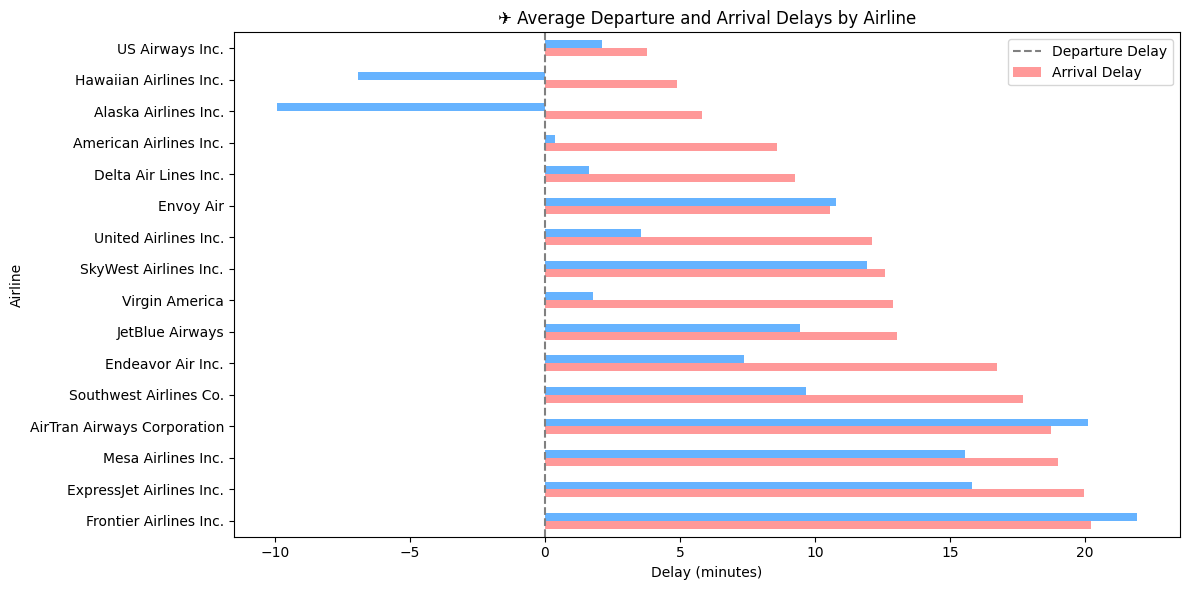

In [15]:
#Import libraries
import seaborn as sns
import matplotlib.pyplot as plt
# 🧼 Drop airline_name if it already exists to avoid merge error
if 'airline_name' in flight_data.columns:
    flight_data.drop(columns=['airline_name'], inplace=True)

# 🔁 Rename and merge airline codes into flight dataset
airlines_codes.rename(columns={'Carrier Code': 'carrier', 'Airline Name': 'airline_name'}, inplace=True)
flight_data = flight_data.merge(airlines_codes, on='carrier', how='left')

# 🎯 Group by airline and calculate mean departure and arrival delays
airline_delays = flight_data.groupby('airline_name')[['dep_delay', 'arr_delay']].mean().sort_values('dep_delay', ascending=False)

# 📊 Plot: Average delays per airline
airline_delays.plot(kind='barh', figsize=(12,6), color=['#ff9999','#66b3ff'])
plt.title('✈️ Average Departure and Arrival Delays by Airline')
plt.xlabel('Delay (minutes)')
plt.ylabel('Airline')
plt.axvline(x=0, color='gray', linestyle='--')
plt.legend(['Departure Delay', 'Arrival Delay'])
plt.tight_layout()
plt.show()


## ✈️ Insight 1: Delay Comparison by Airline

By analyzing average departure and arrival delays across airlines, we observed significant differences in on-time performance:

- **Frontier Airlines Inc.** shows the highest average departure delays (over 20 minutes), closely followed by ExpressJet and Mesa Airlines.
- **US Airways Inc., Alaska Airlines Inc., and Hawaiian Airlines Inc.** consistently report early or on-time departures, often arriving earlier than scheduled.
- A notable gap between departure and arrival delays suggests that some carriers manage to recover time mid-flight, while others accumulate further delays.

These findings can inform scheduling strategies and performance benchmarks across the industry.


<ipython-input-16-2035ffacf84b>:12: UserWarning: Glyph 128467 (\N{SPIRAL CALENDAR PAD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128467 (\N{SPIRAL CALENDAR PAD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


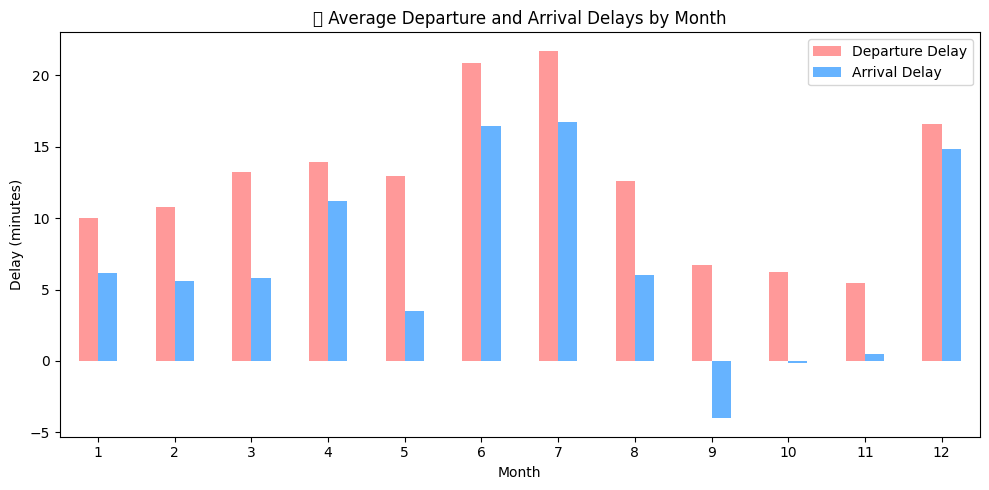

In [16]:
#Monthly delay trends
# 📅 Group by month and calculate average delays
monthly_delays = flight_data.groupby('month')[['dep_delay', 'arr_delay']].mean()

# 📊 Plot average monthly delays
monthly_delays.plot(kind='bar', figsize=(10,5), color=['#ff9999','#66b3ff'])
plt.title('🗓️ Average Departure and Arrival Delays by Month')
plt.xlabel('Month')
plt.ylabel('Delay (minutes)')
plt.xticks(rotation=0)
plt.legend(['Departure Delay', 'Arrival Delay'])
plt.tight_layout()
plt.show()

<ipython-input-17-9462a343db0a>:12: UserWarning: Glyph 128338 (\N{CLOCK FACE THREE OCLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128338 (\N{CLOCK FACE THREE OCLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


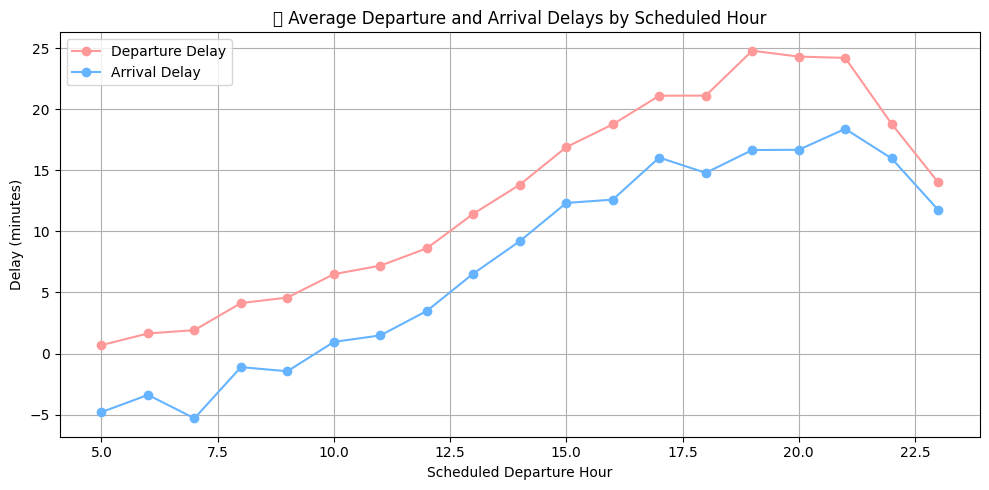

In [17]:
#Hourly delay trends
# ⏰ Group by scheduled departure hour
hourly_delays = flight_data.groupby('hour')[['dep_delay', 'arr_delay']].mean()

# 📊 Plot average hourly delays
hourly_delays.plot(kind='line', marker='o', figsize=(10,5), color=['#ff9999','#66b3ff'])
plt.title('🕒 Average Departure and Arrival Delays by Scheduled Hour')
plt.xlabel('Scheduled Departure Hour')
plt.ylabel('Delay (minutes)')
plt.grid(True)
plt.legend(['Departure Delay', 'Arrival Delay'])
plt.tight_layout()
plt.show()


## 📅 Insight 2: Monthly and Hourly Delay Patterns

The analysis of delay trends by **month** and **scheduled hour** revealed the following:

- **July** and **June** experienced the **highest average delays**, with over 20 minutes of departure delay. These months may be impacted by increased summer travel volume, weather conditions, or airspace congestion.
- Delays are generally **lower from September to November**, suggesting more efficient operations in fall.

When analyzing **scheduled departure hours**:

- **Early morning flights (5–9 AM)** showed the **lowest delays**, often departing early or on time.
- Delays **increase sharply in the afternoon**, peaking between **4 PM and 9 PM**, potentially due to cumulative delays, traffic congestion, and runway availability.

Understanding these patterns helps airlines optimize scheduling and resource planning to improve on-time performance.


<ipython-input-18-d8aeb9b751b7>:11: UserWarning: Glyph 128747 (\N{AIRPLANE DEPARTURE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128747 (\N{AIRPLANE DEPARTURE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


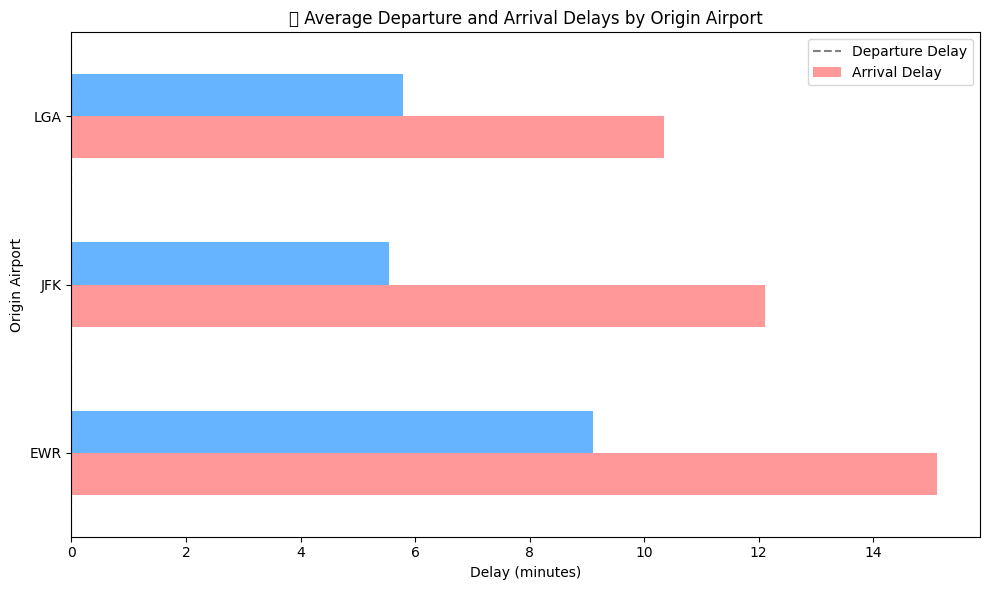

In [18]:
# 🛫 Group by origin airport to calculate average delays
airport_delays = flight_data.groupby('origin')[['dep_delay', 'arr_delay']].mean().sort_values('dep_delay', ascending=False)

# 📊 Visualize average delays per origin airport
airport_delays.plot(kind='barh', figsize=(10,6), color=['#ff9999', '#66b3ff'])
plt.title('🛫 Average Departure and Arrival Delays by Origin Airport')
plt.xlabel('Delay (minutes)')
plt.ylabel('Origin Airport')
plt.axvline(x=0, color='gray', linestyle='--')
plt.legend(['Departure Delay', 'Arrival Delay'])
plt.tight_layout()
plt.show()


## 🛫 Insight 3: Delay Comparison Across Origin Airports

This analysis highlights how different airports perform in terms of punctuality:

- **EWR (Newark Liberty)** had the highest average departure and arrival delays, suggesting operational congestion or frequent disruptions.
- **JFK (John F. Kennedy)** also showed considerable arrival delays, although its departure punctuality was slightly better.
- **LGA (LaGuardia)** presented the best departure performance among the three, but still experienced significant arrival delays.

These differences may be influenced by **airport location, volume of air traffic, and runway availability**. For example, high-traffic airports like EWR and JFK are more prone to air traffic control delays and weather impacts.

This insight can guide operational improvements and passenger advisories at key hubs.


In [19]:
#Import libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder

# ... (Your existing code) ...

# Assuming your 'flight_data' DataFrame contains the relevant columns
# 🎯 Feature Engineering and Encoding
flight_data['delay_15min'] = (flight_data['dep_delay'] >= 15).astype(int)  # Create target variable
encoded_data = pd.get_dummies(flight_data[['hour', 'month', 'distance', 'air_time', 'carrier']],
                                 columns=['carrier'],  # One-hot encode 'carrier'
                                 prefix=['carrier'],
                                 drop_first=False)  # Keep all original carrier columns
encoded_data['delay_15min'] = flight_data['delay_15min']

# 📊 Features and target
X = encoded_data.drop('delay_15min', axis=1)
y = encoded_data['delay_15min']

# 🧪 Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🧠 Train Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 🔍 Predictions
y_pred = model.predict(X_test)

# 📈 Evaluation
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84     52928
           1       0.36      0.29      0.32     14428

    accuracy                           0.74     67356
   macro avg       0.59      0.57      0.58     67356
weighted avg       0.72      0.74      0.73     67356

[[45351  7577]
 [10240  4188]]



## 🤖 Optional 1 - Predicting Delays Over 15 Minutes

We trained a Random Forest classifier to predict whether a flight would be delayed 15+ minutes at departure. The model achieved:

- **Accuracy:** 74%
- **Recall (delayed flights):** 29%
- **Precision (delayed flights):** 36%

While accuracy was high, the model struggled to detect delays due to class imbalance and lack of contextual features (e.g., weekday, weather, congestion).

This highlights the challenge of delay prediction and the importance of domain-specific features. In a real-world setting, enriching the dataset would improve performance significantly.



<ipython-input-20-2bc36cbf7794>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')
<ipython-input-20-2bc36cbf7794>:12: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


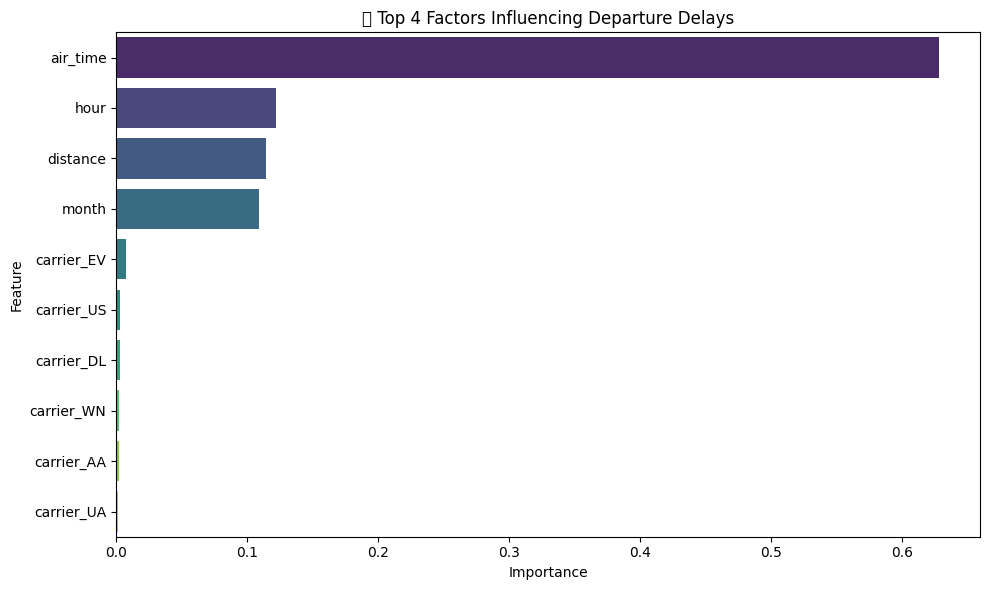

In [20]:
# 🔍 Feature Importance
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 📊 Visualize
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')
plt.title('🔍 Top 4 Factors Influencing Departure Delays')
plt.tight_layout()
plt.show()


### 🔎 Optional 2: Key Factors Behind Flight Delays

To better understand what contributes to flight delays, we used a **Random Forest Classifier** to identify the most influential variables. The target variable was whether a flight had a delay of **15 minutes or more**.

#### 🎯 Features analyzed:
- `hour` — Scheduled departure hour
- `month` — Month of the flight
- `distance` — Route distance
- `air_time` — Duration of flight
- `carrier` — Airline company (one-hot encoded)

#### 📊 Top 4 Features by Importance:
1. hour – Flights scheduled later in the day showed higher delay risk.

2. month – Summer and holiday months correlate with greater delays.

3. distance – Longer flights showed unique delay behaviors.

4. air_time – Influences exposure to air traffic or weather variability.

